In [19]:
#get larlite
from larlite import larlite as ll

In [20]:
#create storage manager
sm = ll.storage_manager()
sm.set_io_mode(ll.storage_manager.kREAD)
sm.add_in_filename("../../App/mac/baby_output.root")
sm.open()

True

In [21]:
#there is only 1 event
sm.next_event()

True

In [22]:
#get hits and clusters
event_hits     = sm.get_data(ll.data.kHit,"fake_pi0")
event_clusters = sm.get_data(ll.data.kCluster,"ImageClusterHit")

#get ass
event_ass      = sm.get_data(ll.data.kAssociation,"ImageClusterHit")

#get association
cluster_to_hit_ass = event_ass.association(event_clusters.id(),event_hits.id())

#get contour data
event_user = sm.get_data(ll.data.kUserInfo,"ImageClusterHit")

In [23]:
#graphics 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#copy hits out into number array, super duper slow
hxy = np.array([ [event_hits[i].WireID().Wire,event_hits[i].PeakTime()] for i in xrange(event_hits.size())])

In [25]:
print "There are...",cluster_to_hit_ass.size()," clusters."

There are... 2  clusters.


In [26]:
#How much data is in event_user?
print event_user.size()

2


In [27]:
sbc_data=event_user[0]
pcao_data=event_user[1]

In [28]:
#See terminal for list of available keys
sbc_data.dump_contents()

#See terminal for list of available keys
pcao_data.dump_contents()

58.347107438
63.8397839784


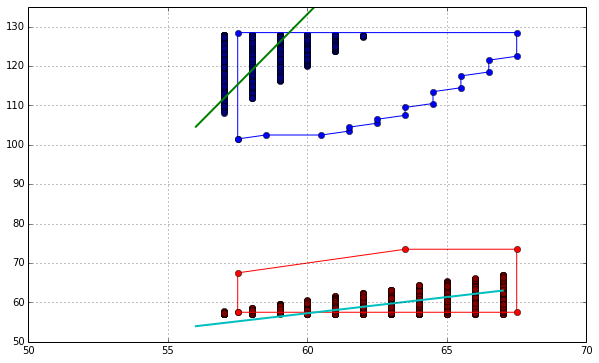

In [55]:
#Show the ImageClusters
hsv = plt.get_cmap('jet')
lors = hsv(np.linspace(0, 1.0, cluster_to_hit_ass.size()))

fig,ax=plt.subplots(figsize=(10,6))

# plot each cluster and userinfo
for ix,cluster in enumerate(cluster_to_hit_ass):
    
    #get the hits for this clusters
    hslice = hxy[np.array(cluster)]
    plt.plot(hslice[:,0],hslice[:,1],'o',color=lors[ix])
    
    #call user_info get_darray, for the contour   
    xx=np.array(sbc_data.get_darray('sbc_2_{}_x'.format(ix)))
    yy=np.array(sbc_data.get_darray('sbc_2_{}_y'.format(ix)))

    xx=np.append(xx,xx[0])
    yy=np.append(yy,yy[0])

    plt.plot(yy,xx,'o-')
    
    #call user_info get_darray, for PCA
    dir_=np.array(pcao_data.get_darray('pcao_2_dir_{}'.format(ix)))

    #get the mean value of X and Y points for this clusters
    mean_x=hslice[:,0].mean()
    mean_y=hslice[:,1].mean()
         
    #slope is the ratio of dir_y/x
    slope=dir_[0]/dir_[1]
    
    #generate some fake X values for PCA line
    xline=np.arange(56,68,1)
    plt.plot(xline,slope*(xline-mean_x)+mean_y,'-',lw=2)
    
    print mean_x
    
    
ax.set_ylim(50,135)
ax.set_xlim(50,70)
plt.grid()
plt.show()